## Predicting breast cancer using machie learning

This notebook looks into using various Python-based machie learning and data science libraries in an attempt to build ML model capable of predecting whether the tumor is malignant or benign based on cell attributes

Taking the following approch:

* Problem defination
* Data
* Evaluation
* Features
* Modelling
* Experimentation

**1. Problem defination**
-> Given the cell measurements of a breast tissue sample, can we predict whether the tumor is malignant(M) or benign(B)

**2. Data**
-> The original data came from the UCI machine learning repositry Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  Also available in kaggle dataset, the dataset is the Breast Cancer Wisconsin (Diagnostic) Dataset.

**3. Evaluation**
-> If we reach 95% accuracy at predecting during the proof of concept, we'll pursue the project

**4. Features**

`Create data dictionary`

- radius → mean of distances from center to points on the perimeter
- texture → standard deviation of gray-scale values
- perimeter → length of the tumor boundary
- area → size of the tumor region
- smoothness → local variation in radius lengths
- compactness → (perimeter² / area – 1.0)
- concavity → severity of concave portions of the contour
- concave points → number of concave portions of the contour
- symmetry → symmetry of the tumor shape
- fractal dimension → “coastline approximation” (measure of complexity of tumor boundary)
  

In [423]:
# Import all the tools we need 

#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,recall_score
from sklearn.metrics import RocCurveDisplay

In [424]:
# Load data
df=pd.read_csv("breast-cancer-data.csv")
df.shape #(rows,cols)

(569, 33)

**Data exploration (EDA)**

The goal is here to know more about the data and become a subject matter expert on the dataset you're working with

In [425]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [426]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [427]:
df["diagnosis"].value_counts() #imbalanced data M(63%) and B(37%)

diagnosis
B    357
M    212
Name: count, dtype: int64

In [428]:
df=df.drop(columns=["Unnamed: 32","id"],axis=1) #all are null in this column
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


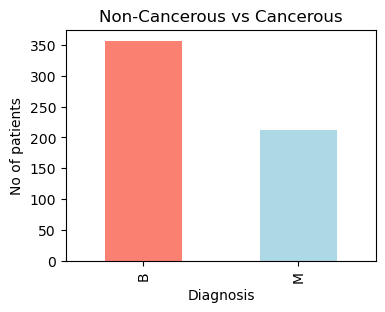

In [429]:
plt.figure(figsize=(4,3))
df["diagnosis"].value_counts().plot(kind="bar",
                                    title="Non-Cancerous vs Cancerous",
                                    color=["salmon","lightblue"])
plt.xlabel("Diagnosis")
plt.ylabel("No of patients")
plt.show();

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [431]:
df.isnull().sum().sum() # no missing values

np.int64(0)

In [432]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [433]:
#cancer frequency according to radius mean of cell
df.groupby("diagnosis")["radius_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,12.146524,1.780512,6.981,11.080,12.200,13.37,17.85
M,212.0,17.462830,3.203971,10.950,15.075,17.325,19.59,28.11


C:\Users\Vedashri\AppData\Local\Temp\ipykernel_21572\3241707650.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="diagnosis", y="radius_mean", data=df, palette=["lightblue","salmon"])


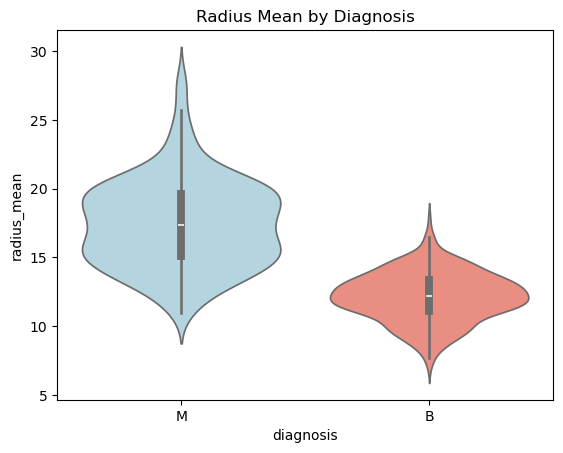

In [434]:
sns.violinplot(x="diagnosis", y="radius_mean", data=df, palette=["lightblue","salmon"])
plt.title("Radius Mean by Diagnosis")
plt.show()

 As the radius_mean of cell increases the probablity of cancer increases.
 
 So `radius_mean` is a strong parameter to detect cancer

In [435]:
df.groupby("diagnosis")["area_mean"].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,462.790196,134.287118,143.5,378.2,458.4,551.10,992.1
M,212.0,978.376415,367.937978,361.6,705.3,932.0,1203.75,2501.0


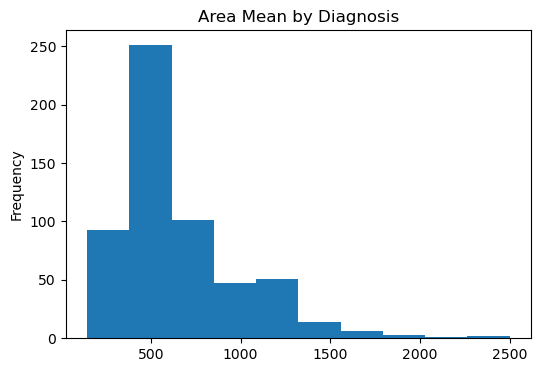

In [436]:
plt.figure(figsize=(6,4))
df.area_mean.plot.hist()
plt.title("Area Mean by Diagnosis")
plt.show();

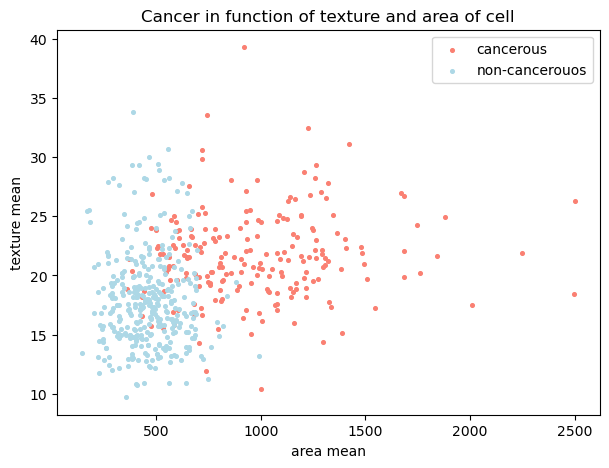

In [437]:
# Texture vs area of cell for breast cancer

plt.figure(figsize=(7,5))

# scatter with +ve examples
plt.scatter(df.area_mean[df.diagnosis=='M'],
           df.texture_mean[df.diagnosis=='M'],
           c="salmon",
           s=7)
# scatter with -ve examples
plt.scatter(df.area_mean[df.diagnosis=='B'],
           df.texture_mean[df.diagnosis=='B'],
           c="lightblue",
           s=7)

plt.title("Cancer in function of texture and area of cell")
plt.xlabel("area mean")
plt.ylabel("texture mean")
plt.legend(["cancerous","non-cancerouos"])
plt.show();

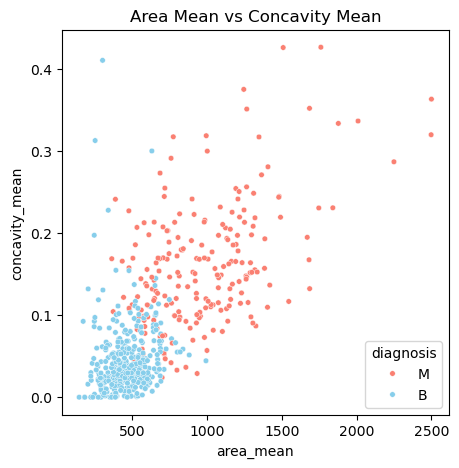

In [438]:
# Concavity vs area of cell for breast cancer
plt.figure(figsize=(5,5))
sns.scatterplot(x='area_mean', y='concavity_mean',
                hue='diagnosis', data=df,s=16,
                palette={'M':'salmon','B':'skyblue'})
plt.title("Area Mean vs Concavity Mean")
plt.show()

In [439]:
# Covert target into 1 and o form
df['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})
df=df.drop("diagnosis",axis=1)

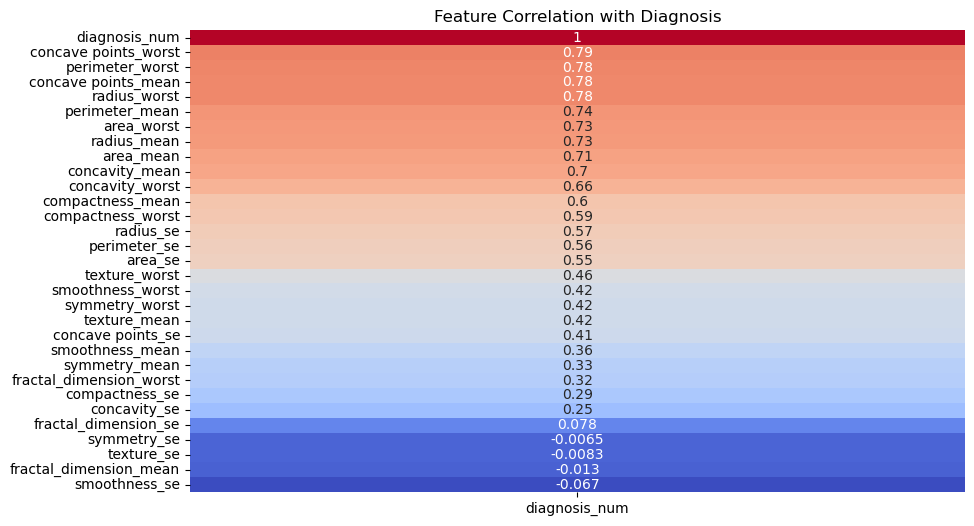

In [440]:
# Keep only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr[['diagnosis_num']].sort_values(by='diagnosis_num', ascending=False),
            annot=True, cmap='coolwarm', cbar=False)
plt.title("Feature Correlation with Diagnosis")
plt.show()

In [441]:
df.select_dtypes(include=["number"]).corr()[["diagnosis_num"]].sort_values(by="diagnosis_num",ascending=False)

,diagnosis_num
diagnosis_num,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


## Modelling

In [442]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [443]:
#slpit into x and y
x=df.drop("diagnosis_num",axis=1)
y=df["diagnosis_num"]

In [444]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(x_test)

(455, 114)

In [445]:
#Scaling features for logistic regression
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### ML models we will try;

1. Logistic regression -> start from baseline model

In [446]:
#Train the logistic regression model
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [447]:
y_pred=lr_model.predict(x_test_scaled)
score=lr_model.score(x_test_scaled,y_test)
print(f"Logistic regression model score: {score:.3f}")

Logistic regression model score: 0.974


In [448]:
#Try random forest classifier for improvement
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [449]:
y_pred2=rf_model.predict(x_test)
score=rf_model.score(x_test,y_test)
print(f"Random forest classifier score: {score:.3f}")

Random forest classifier score: 0.965


In [450]:
#Calculating recall score 

print(f"Recall score for logistic regression is {recall_score(y_test,y_pred):.3f}")
print(f"Recall score for random forest is {recall_score(y_test,y_pred2):.3f}")

Recall score for logistic regression is 0.953
Recall score for random forest is 0.930


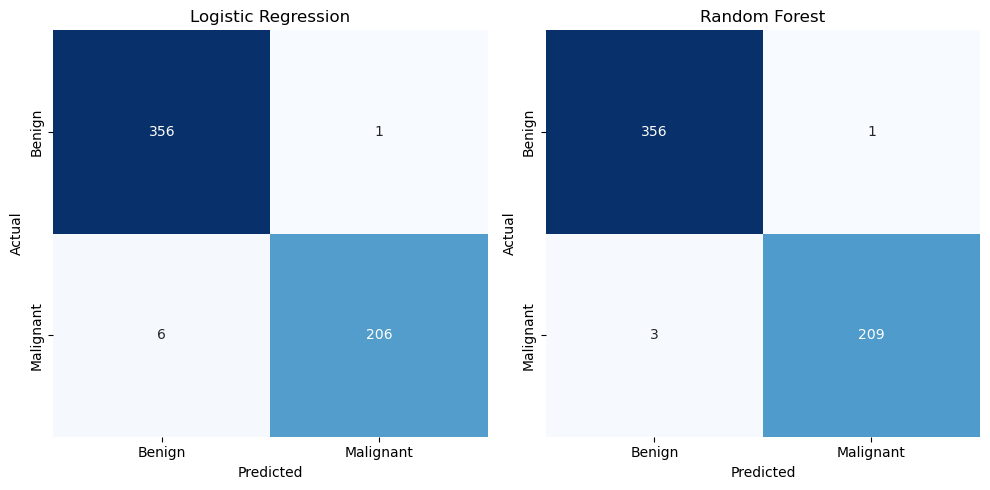

In [451]:
#Compare confusion matrix of two models
x_scaled=scaler.fit_transform(x)

pred=lr_model.predict(x_scaled)
cm_lr=confusion_matrix(y,pred)

pred2=rf_model.predict(x)
cm_rf=confusion_matrix(y,pred2)

fig,axes=plt.subplots(1,2,figsize=(10,5))
#Logistic regression
sns.heatmap(cm_lr,annot=True,cbar=False,
            fmt="d",cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"],
            ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

#Random forest classifier
sns.heatmap(cm_rf,annot=True,cbar=False,
            fmt="d",cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"],
           ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

### From above, we can interpret this:

##### By confusion matrix
* In logistic regression -> `6 cases` of cancerous patient missed, that is risky in medical context
* In random forest -> `3 cases` of cancer patient missed

##### By recall score

>Recall score for LR is 0.953 and Recall score for RF is 0.930

* Logistic regression correctly detects ~95% of cancer cases
* Random forest correctly detects ~93% of cancer cases

Lower FN → higher recall → safer model.

Since both models showed nearly similar recall and false-negative performance, we will try tuning hyperparametrs of both to compare interpretability and error trade-offs rather than relying on a single metric.

#### Hypertuning parameters of random forest

In [452]:
grid={
    "n_estimators": [200, 300],
    "max_depth": [None, 15, 25],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"]
}

grid_model=GridSearchCV(rf_model,grid,cv=5,scoring="recall",n_jobs=-1)
grid_model.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 15, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [453]:
best_rf=grid_model.best_estimator_
grid_model.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [454]:
y_pred_best=best_rf.predict(x_test)
print(recall_score(y_test, y_pred_best))

0.9302325581395349


#### Hypertuning parameters of logistic regression

In [455]:
#Tuning the parameters of logistic regression model

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [500, 1000]
}
grid_lr_model=GridSearchCV(lr_model,param_grid,cv=5,scoring="recall",n_jobs=-1)
grid_lr_model.fit(x_train_scaled,y_train)

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced'], 'max_iter': [500, 1000], 'penalty': ['l2'], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [456]:
best_lr=grid_lr_model.best_estimator_
grid_lr_model.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [457]:
y_pred_best=best_lr.predict(x_test_scaled)
print(recall_score(y_test, y_pred_best))
print(accuracy_score(y_test, y_pred_best))

0.9767441860465116
0.9824561403508771


### Model Selection & Comparison

Logistic Regression clearly outperforms Random Forest in our final evaluation.

Chosen Model: `Logistic Regression`

Reason:
* Minimizes false negatives (most critical metric)
* Achieves highest recall
* Produces more reliable predictions for medical diagnosis

------------ Evaluation of Logistic regression -------------

Accuracy: 0.982
Recall: 0.977


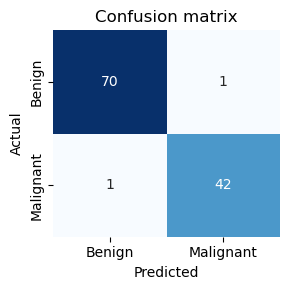


------------ Evaluation of Random forest -------------

Accuracy: 0.965
Recall: 0.930


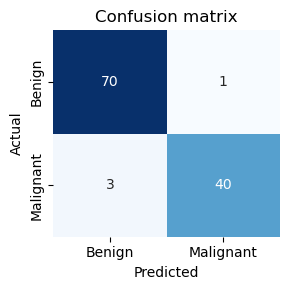

In [458]:
def evaluation_model(model,x_test,model_name):
    print(f"------------ Evaluation of {model_name} -------------\n")
    y_pred=model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    
    cm=confusion_matrix(y_test,y_pred) 
    fig,ax=plt.subplots(figsize=(3,3))
    sns.heatmap(cm,annot=True,cbar=False,
                fmt="d",cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"],)
    ax.set_title(f"Confusion matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    plt.tight_layout()
    plt.show()
    print()

evaluation_model(best_lr,x_test_scaled,"Logistic regression")

evaluation_model(best_rf,x_test,"Random forest")

In [459]:
#Accuracy of our final model
y_pred=best_lr.predict(x_test_scaled)
print(f"Accuracy score of tuned model: {accuracy_score(y_test, y_pred):.3f}")

Accuracy score of tuned model: 0.982


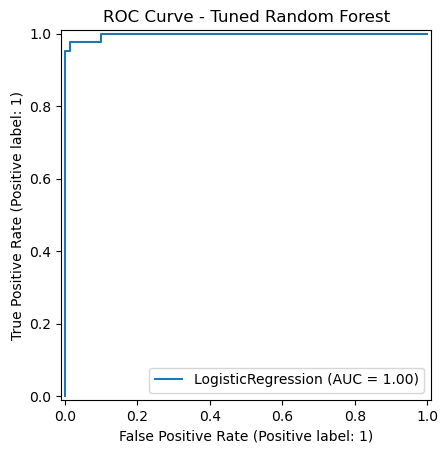

In [460]:
#Evaluating our tuned machine learning classifier
#plot ROC curve and calculate AUC metric

RocCurveDisplay.from_estimator(best_lr,x_test_scaled,y_test)

plt.title("ROC Curve - Tuned Random Forest")
plt.show()

In [461]:
cross_val_score(best_lr, x_scaled, y, cv=5).mean()

np.float64(0.9754230709517155)

In [464]:
#Exporting model
import joblib

feature_order=x.columns.tolist()
joblib.dump(
    {"model":best_lr,
    "scaler":scaler, 
    "features":feature_order},
    "breast-cancer-model2.pkl"
)

['breast-cancer-model2.pkl']